# Understanding the Data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Impporting some other libraries for Modeling of data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

# Read Case File

## Importing the Dataset

In [3]:
Lead_Data = pd.read_csv(r"C:\Users\prashant kumar amit\OneDrive\Desktop\Data Science Training\Case Study_Lead Scoring\Lead Scoring Assignment\Leads.csv")
Lead_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead_Data.shape

(9240, 37)

In [5]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Summary


1. From above analysis of the data we have, we see that data contains a lot of categorical values for which we need to create dummy variables
2. Data also contains some null values which will be treated accordingly.

# Data Cleaning & Data Preparations

### Handling NULL Values

In [7]:
#Checking all columns containing null values
def null_values(ad):
    return round((ad.isnull().sum()*100/len(ad)).sort_values(ascending = False),2)
null_values(Lead_Data).head(25)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [8]:
# checking all columns with more than 30 % NULL Values
null_Val_30 = null_values(Lead_Data)[null_values(Lead_Data)>30]
print(null_Val_30)

Lead Quality                   51.59
Asymmetrique Activity Index    45.65
Asymmetrique Profile Score     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Index     45.65
Tags                           36.29
dtype: float64


In [9]:
#Dropping columns with more than 30 % NULL Values
Lead_Data.drop(columns = null_Val_30.index, inplace = True)
Lead_Data.shape

(9240, 31)

In [10]:
null_values(Lead_Data).head(25)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [11]:
# Checking all the data only for columns that have null values
Lead_Data_NullColumns=Lead_Data[["What matters most to you in choosing a course","Lead Profile","What is your current occupation","Country","How did you hear about X Education","Specialization","City"]]
Lead_Data_NullColumns.head()

,What matters most to you in choosing a course,Lead Profile,What is your current occupation,Country,How did you hear about X Education,Specialization,City
0,Better Career Prospects,Select,Unemployed,NaN,Select,Select,Select
1,Better Career Prospects,Select,Unemployed,India,Select,Select,Select
2,Better Career Prospects,Potential Lead,Student,India,Select,Business Administration,Mumbai
3,Better Career Prospects,Select,Unemployed,India,Word Of Mouth,Media and Advertising,Mumbai
4,Better Career Prospects,Select,Unemployed,India,Other,Select,Mumbai


some of the rows in above data contains "Select" which means the user did not select any option, that means these data are equivalent to missing or null values.

In [12]:
#Replacing 'Select' values with Nan
Lead_Data=Lead_Data.replace("Select", np.nan)

In [13]:
null_values(Lead_Data).head(25)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

from above as we see now the NULL value % have increased and we now know which columns to remove looking at the high number of null values. BUT before we proceed to remove those columns, lets also check which columns have relevant data and try to find value count.

In [14]:
for column in Lead_Data:
    print(Lead_Data[column].astype('category').value_counts())
    print('-------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
-------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------

from above analysis , we see few columns have high number of same answers from the users, lets summarise those names of the columns.
"Do Not Email","Do Not Call","Country","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement"."Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","City","I agree to pay the amount through cheque".

since all the answers for these columsn are NO, its OK to drop these columns as they wont help witht he analysis. also Columns like City and Country should also be dropped as its not relevant for our analysis.

In [15]:
# dropping all the above columns and also those 2 columns with more than &0% null values.
Lead_Data.drop(['Lead Profile', 'How did you hear about X Education','Do Not Email','Do Not Call','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [16]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [17]:
#Checking the Null values and analysing as how to handle those null values per columns
null_values(Lead_Data).head(25)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

Specialization columns are also having more than 30% of the null values, lets drp this columns as well

In [18]:
Lead_Data.drop(['Specialization'], axis = 1, inplace = True)

In [19]:
null_values(Lead_Data).head(25)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [20]:
Lead_Data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# as seen from above value counts, we can drop this column too
Lead_Data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [22]:
Lead_Data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
# as seen from above value counts, we can replace all null values with 'Not Provided'
Lead_Data['What is your current occupation'] = Lead_Data['What is your current occupation'].replace(np.nan,'Not Provided')

In [24]:
Lead_Data['What is your current occupation'].value_counts()

Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
Lead_Data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [26]:
#Replacing missing Values and combining the lowest count responses to a generic one. 
Lead_Data['Lead Source']=Lead_Data['Lead Source'].replace(np.nan,'Others')
Lead_Data['Lead Source']=Lead_Data['Lead Source'].replace('google','Google')
Lead_Data['Lead Source']=Lead_Data['Lead Source'].replace('Facebook','Social Media')
Lead_Data['Lead Source']=Lead_Data['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'],'Others')

In [27]:
null_values(Lead_Data).head(25)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

as we see that now missing values are less than 2% in columns, and are very less so even if we remove those rows, it will not impact our data analysis.

In [28]:
Lead_Data = Lead_Data.dropna()

In [29]:
Lead_Data.shape

(9103, 12)

In [30]:
null_values(Lead_Data).head(25)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now we are left with no null values. now if we look at the columns there are 2 columns which will not help us in analysis as it is an identifier to the past leads. so dropping those 2 columns will be helpful.

In [31]:
#dropping ProspectID, Lead Number
Lead_Data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [32]:
null_values(Lead_Data).head(25)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [33]:
Lead_Data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [34]:
Lead_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   What is your current occupation         9103 non-null   object 
 8   A free copy of Mastering The Interview  9103 non-null   object 
 9   Last Notable Activity                   9103 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


In [35]:
Lead_Data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [36]:
# Check the columns which are of type 'object'

Col_Object = Lead_Data.loc[:, Lead_Data.dtypes == 'object']
Col_Object.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# DATA ANALYSIS

### Categorical Analysis

Converted column is our Target column as it states if the leads are converted to Sales or Not by appointing 1 and 0 respectively for conversion succeed and conversion failed.

#### Lead Source

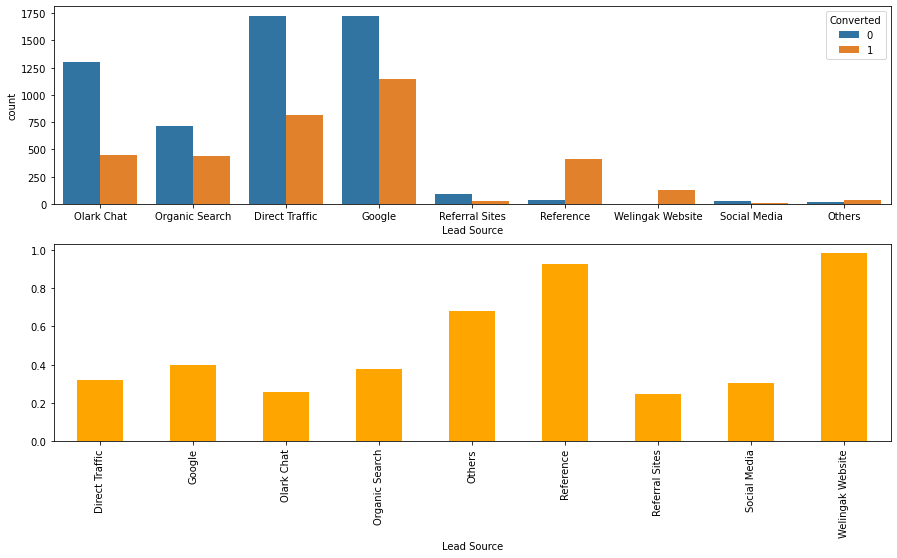

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =Lead_Data)
plt.subplot(2,1,2)
Lead_Data.groupby(["Lead Source"])["Converted"].mean().plot.bar(color='Orange')

plt.show()

#### Inference
 * Maximum Leads are generated by Google and Direct Traffic
 * Conversion Rate for Reference Leads and Welinkgak Website Leads are Very High

#### Lead Origin

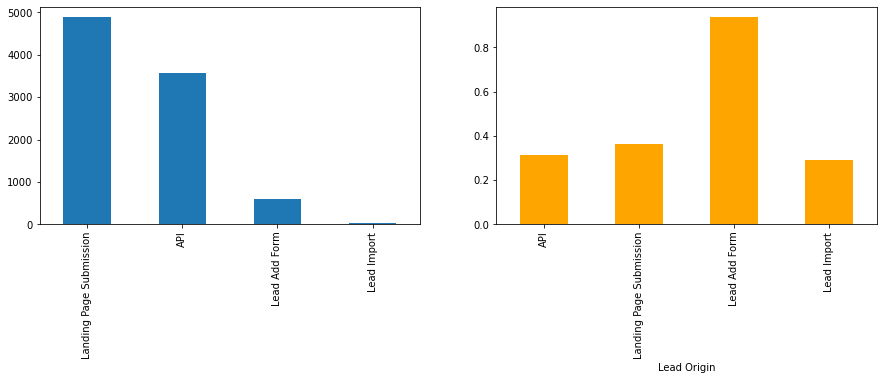

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
Lead_Data["Lead Origin"].value_counts(normalize=False).plot.bar()
plt.subplot(1,2,2)
Lead_Data.groupby(["Lead Origin"])["Converted"].mean().plot.bar(color='Orange')

plt.show()

#### What is your current occupation



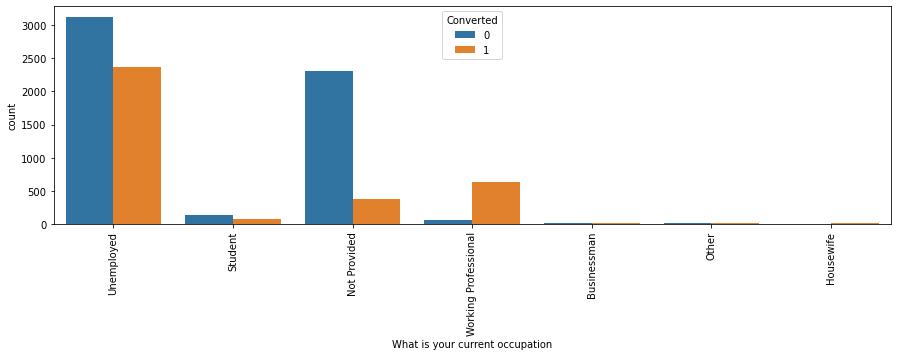

In [39]:
plt.figure(figsize=(15,4))
s1=sns.countplot(x= "What is your current occupation", hue='Converted' , data =Lead_Data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
 * Maximum Leads are generated by Unemployed and have more than 50% of conversion rate
 * Conversion Rate for working professionals are Very High

#### Last Activity 

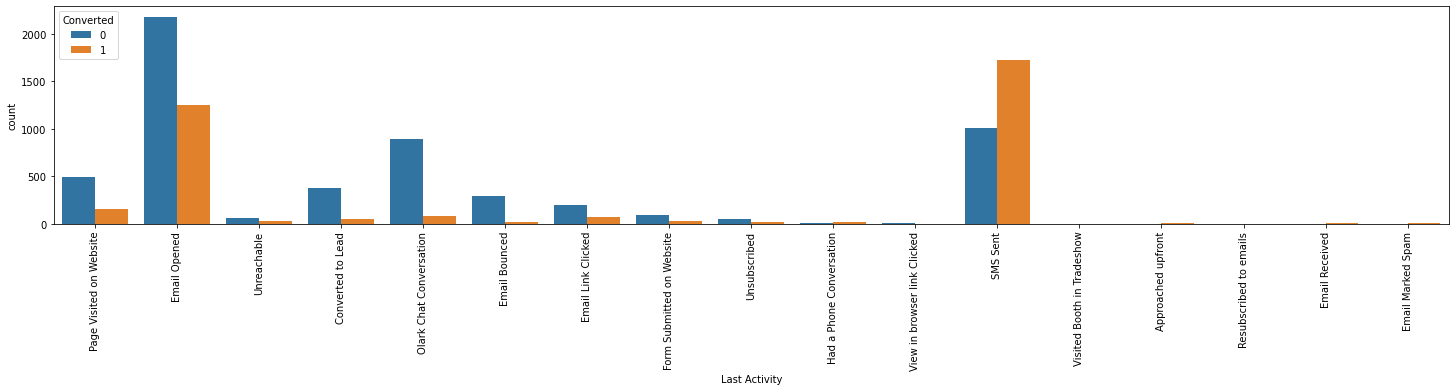

In [40]:
plt.figure(figsize=(25,4))
s1=sns.countplot(x= "Last Activity", hue='Converted' , data =Lead_Data)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
 * Maximum Leads are generated having last activity Email opened but conversion rate i snot good.
 * Conversion Rate for last activity SMS sent are Very High

### Numerical Analysis

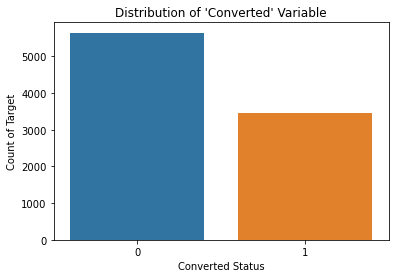

38.02043282434362

In [41]:
#Visualizing Distribution of 'Converted' Variable
sns.countplot(Lead_Data.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

#Overall Conversion rate
Conversion_rate = (sum(Lead_Data['Converted'])/len(Lead_Data['Converted'].index))*100
Conversion_rate

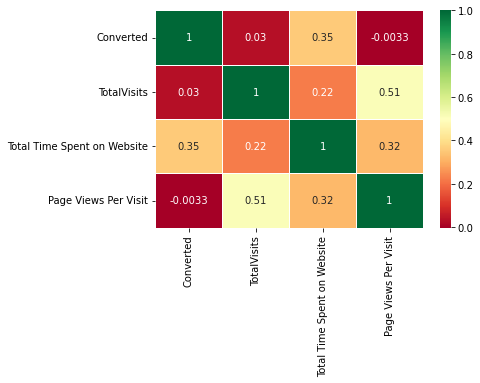

In [42]:
#checking the correlation on heatmap
plt.figure(figsize=[6,4])
sns.heatmap(Lead_Data.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

#### Total visits

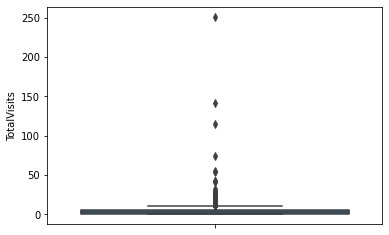

In [43]:
#Checking spread of the Data
sns.boxplot(y=Lead_Data['TotalVisits'])
plt.show()

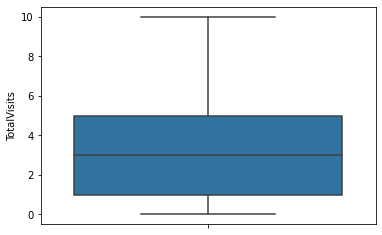

In [44]:
# Outliers are present, Treating Outliers  by capping it to 95% Value
percentiles = Lead_Data['TotalVisits'].quantile([0.05,0.95]).values
Lead_Data['TotalVisits'][Lead_Data['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_Data['TotalVisits'][Lead_Data['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=Lead_Data['TotalVisits'])
plt.show()

#### Total Visit Vs Converted

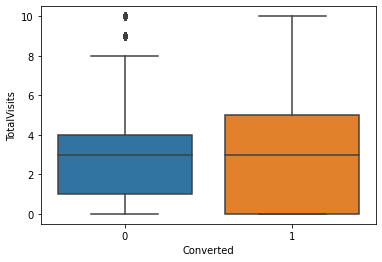

In [45]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_Data)
plt.show()

#### Inference
 * as the Median for both converted and non-converted leads are same, so its difficult to conclude anything

#### Total Time Spent on Website

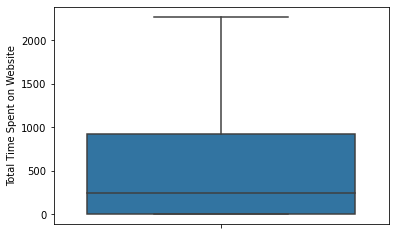

In [46]:
#Checking spread of the Data
sns.boxplot(y = Lead_Data['Total Time Spent on Website'])
plt.show()

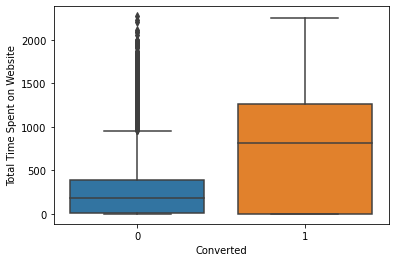

In [47]:
# No Outliers, Hence checking 'Total Time Spent on Website' vs Converted
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_Data)
plt.show()

#### Inference
 * Leads spending more time on website have more conversion Rate

#### Page views per visit

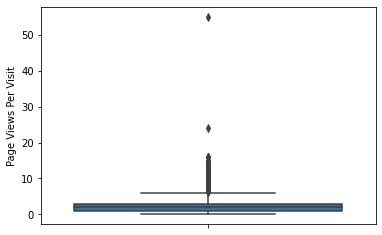

In [48]:
#Checking spread of the Data
sns.boxplot(y = Lead_Data['Page Views Per Visit'])
plt.show()

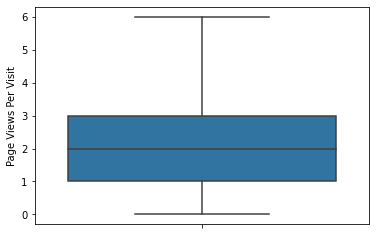

In [49]:
# Outliers are present, Treating Outliers  by capping it to 95% Value
percentiles = Lead_Data['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_Data['Page Views Per Visit'][Lead_Data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Lead_Data['Page Views Per Visit'][Lead_Data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=Lead_Data['Page Views Per Visit'])
plt.show()

#### Page Views Per Visit Vs Converted

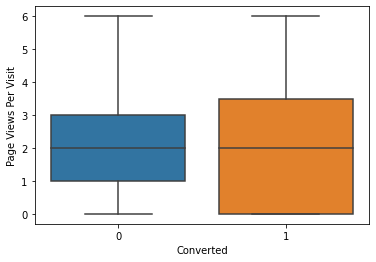

In [50]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_Data)
plt.show()

#### Inference
 * as the Median for both converted and non-converted leads are same, so its difficult to conclude anything

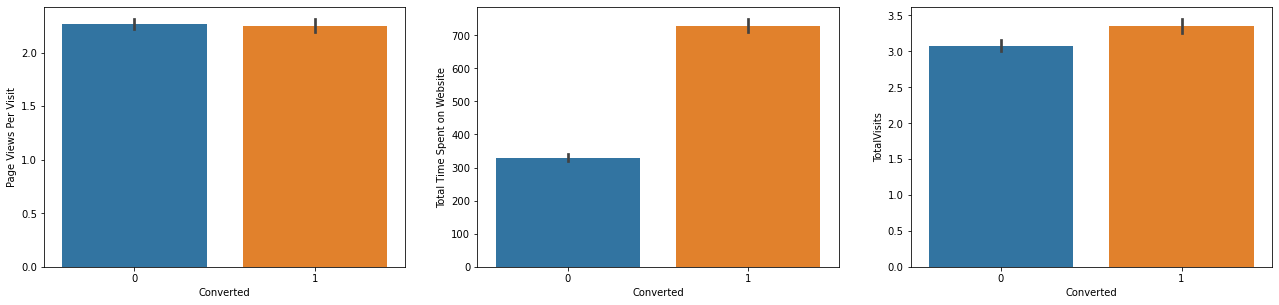

In [51]:
plt.figure(figsize=(22,22))
plt.subplot(4,3,1)
sns.barplot(y= 'Page Views Per Visit', x='Converted' , data =Lead_Data)
plt.subplot(4,3,2)
sns.barplot(y= 'Total Time Spent on Website', x='Converted' , data =Lead_Data)
plt.subplot(4,3,3)
sns.barplot(y= 'TotalVisits', x='Converted' , data =Lead_Data)
plt.show()

#### Inference
 * Conversion are high for all three

## Dummy variable creation

In [52]:
#getting a list of categorical columns foy creating dummy
cat_cols= Lead_Data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Create dummy variables using the 'get_dummies' command
Var_Dummy = pd.get_dummies(Lead_Data[['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [54]:
# Add the results to the master dataframe
Lead_Data = pd.concat([Lead_Data, Var_Dummy], axis=1)

In [55]:
# Drop the variables for which the dummy variables have been created
Lead_Data = Lead_Data.drop(['Lead Origin', 'Lead Source','Last Activity','What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [56]:
Lead_Data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Test-Train Split

In [57]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [58]:
# Putting feature variable to X
X=Lead_Data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
# Putting response variable to y
y = Lead_Data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [61]:
# Import MinMax scaler
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.068258,1.476324,-0.423364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,1.362470,-0.771066,2.083179,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0.647106,-0.571257,0.133646,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1566,2.435517,1.393834,0.690655,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,-1.141305,-0.881052,-1.258878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# Let's see the correlation matrix table
matrix = Lead_Data.corr()
print(matrix)

                                                    Converted  TotalVisits  \
Converted                                            1.000000     0.046728   
TotalVisits                                          0.046728     1.000000   
Total Time Spent on Website                          0.354939     0.363183   
Page Views Per Visit                                -0.003800     0.767588   
Lead Origin_Landing Page Submission                 -0.040698     0.456351   
Lead Origin_Lead Add Form                            0.306224    -0.283085   
Lead Origin_Lead Import                             -0.010824    -0.061444   
Lead Source_Google                                   0.026621     0.219175   
Lead Source_Olark Chat                              -0.125395    -0.501650   
Lead Source_Organic Search                          -0.001874     0.303512   
Lead Source_Others                                   0.045897    -0.047607   
Lead Source_Reference                                0.254067   

In [64]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## Model building

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [67]:
# Select only the columns selected by RFE

X_train = X_train[col]

Model No 1

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.8
Date:                Tue, 10 Jan 2023   Deviance:                       5331.6
Time:                        19:55:30   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2255      0.096    -12.703      0.000      -1.415      -1.036
Total Time Spent on Website                              0.9229      0.035     26.354      0.000       0.854       0.992
Lead Origin_Lead Add Form                                3.3234      0.220     15.094      0.000       2.892       3.755
Lead Source_Welingak Website                             1.6780      0.752      2.232      0.026       0.205       3.152
Last Activity_Email Bounced                             -1.1875      0.319     -3.719      0.000      -1.813      -0.562
Last Activity_Email Opened                               0.5801      0.102      5.666      0.000       0.379       0.781
Last Activity_Had a Phone Conversation                   1.3346      0.787      1.696      0.090      -0.208       2.877
Last Activity_Resubscribed to emails                    12.8572   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.5758      0.103     15.244      0.000       1.373       1.778
What is your current occupation_Housewife               22.9143   1.63e+04      0.001      0.999    -3.2e+04     3.2e+04
What is your current occupation_Not Provided            -1.1097      0.086    -12.836      0.000      -1.279      -0.940
What is your current occupation_Working Professional     2.4882      0.185     13.486      0.000       2.127       2.850
Last Notable Activity_Had a Phone Conversation           1.8112      1.390      1.303      0.193      -0.913       4.536
Last Notable Activity_Modified                          -0.6112      0.086     -7.091      0.000      -0.780      -0.442
Last Notable Activity_Resubscribed to emails            12.8572   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Notable Activity_Unreachable                        2.1635      0.528      4.100      0.000       1.129       3.198
========================================================================================================================
"""

In [69]:
# dropping columns with high p-Value
col = col.drop('What is your current occupation_Housewife',1)
col = col.drop('Last Activity_Resubscribed to emails',1)
col = col.drop('Last Notable Activity_Resubscribed to emails',1)

Model No 2

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.9
Date:                Tue, 10 Jan 2023   Deviance:                       5349.8
Time:                        19:55:30   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2129      0.096    -12.616      0.000      -1.401      -1.024
Total Time Spent on Website                              0.9221      0.035     26.373      0.000       0.854       0.991
Lead Origin_Lead Add Form                                3.3269      0.220     15.124      0.000       2.896       3.758
Lead Source_Welingak Website                             1.6693      0.752      2.221      0.026       0.196       3.143
Last Activity_Email Bounced                             -1.1982      0.319     -3.754      0.000      -1.824      -0.573
Last Activity_Email Opened                               0.5748      0.102      5.634      0.000       0.375       0.775
Last Activity_Had a Phone Conversation                   1.3234      0.787      1.682      0.093      -0.219       2.866
Last Activity_SMS Sent                                   1.5634      0.103     15.168      0.000       1.361       1.765
What is your current occupation_Not Provided            -1.1091      0.086    -12.857      0.000      -1.278      -0.940
What is your current occupation_Working Professional     2.4816      0.184     13.456      0.000       2.120       2.843
Last Notable Activity_Had a Phone Conversation           1.8096      1.390      1.302      0.193      -0.915       4.534
Last Notable Activity_Modified                          -0.6124      0.086     -7.122      0.000      -0.781      -0.444
Last Notable Activity_Unreachable                        2.1507      0.527      4.077      0.000       1.117       3.185
========================================================================================================================
"""

In [71]:
# dropping columns with high p-Value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

Model No 3

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.9
Date:                Tue, 10 Jan 2023   Deviance:                       5351.8
Time:                        19:55:30   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2079      0.096    -12.577      0.000      -1.396      -1.020
Total Time Spent on Website                              0.9222      0.035     26.380      0.000       0.854       0.991
Lead Origin_Lead Add Form                                3.3260      0.220     15.116      0.000       2.895       3.757
Lead Source_Welingak Website                             1.6712      0.752      2.223      0.026       0.198       3.145
Last Activity_Email Bounced                             -1.1985      0.319     -3.755      0.000      -1.824      -0.573
Last Activity_Email Opened                               0.5706      0.102      5.597      0.000       0.371       0.770
Last Activity_Had a Phone Conversation                   2.0233      0.599      3.378      0.001       0.849       3.197
Last Activity_SMS Sent                                   1.5596      0.103     15.139      0.000       1.358       1.762
What is your current occupation_Not Provided            -1.1066      0.086    -12.834      0.000      -1.276      -0.938
What is your current occupation_Working Professional     2.4812      0.184     13.450      0.000       2.120       2.843
Last Notable Activity_Modified                          -0.6207      0.086     -7.236      0.000      -0.789      -0.453
Last Notable Activity_Unreachable                        2.1448      0.527      4.067      0.000       1.111       3.178
========================================================================================================================
"""

In [73]:
# dropping columns with high p-Value
col = col.drop('Lead Source_Welingak Website',1)

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.6
Date:                Tue, 10 Jan 2023   Deviance:                       5359.3
Time:                        19:55:30   Pearson chi2:                 6.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2078      0.096    -12.579      0.000      -1.396      -1.020
Total Time Spent on Website                              0.9222      0.035     26.374      0.000       0.854       0.991
Lead Origin_Lead Add Form                                3.5948      0.209     17.203      0.000       3.185       4.004
Last Activity_Email Bounced                             -1.1714      0.315     -3.720      0.000      -1.789      -0.554
Last Activity_Email Opened                               0.5693      0.102      5.583      0.000       0.369       0.769
Last Activity_Had a Phone Conversation                   2.0198      0.600      3.367      0.001       0.844       3.196
Last Activity_SMS Sent                                   1.5629      0.103     15.179      0.000       1.361       1.765
What is your current occupation_Not Provided            -1.1068      0.086    -12.834      0.000      -1.276      -0.938
What is your current occupation_Working Professional     2.4730      0.185     13.389      0.000       2.111       2.835
Last Notable Activity_Modified                          -0.6234      0.086     -7.273      0.000      -0.791      -0.455
Last Notable Activity_Unreachable                        2.1408      0.528      4.054      0.000       1.106       3.176
========================================================================================================================
"""

Model No 3 seems to be quite stable, we shall go ahead with this model for further analysis.

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Not Provided,1.43
8,Last Notable Activity_Modified,1.33
5,Last Activity_SMS Sent,1.24
1,Lead Origin_Lead Add Form,1.22
3,Last Activity_Email Opened,1.21
7,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
2,Last Activity_Email Bounced,1.08
4,Last Activity_Had a Phone Conversation,1.00
9,Last Notable Activity_Unreachable,1.00


All VIFs are normal so model shall be evaluated further

#### Model Evaluation

In [76]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.847685
5520    0.205955
1962    0.311087
1566    0.957707
9170    0.189862
5097    0.071909
8954    0.549063
309     0.267699
5519    0.173056
1050    0.596270
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8476852 , 0.2059551 , 0.31108678, 0.9577072 , 0.18986214,
       0.07190928, 0.54906256, 0.26769886, 0.17305599, 0.59627001])

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.847685,7962
1,0,0.205955,5520
2,0,0.311087,1962
3,1,0.957707,1566
4,0,0.189862,9170


In [79]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.847685,7962,1
1,0,0.205955,5520,0
2,0,0.311087,1962,0
3,1,0.957707,1566,1
4,0,0.189862,9170,0


we have now the probablities and conversion prediction, lets now evaluate the model

In [80]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8066541117388575


In [81]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3510  443]
 [ 789 1630]]


In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(TP/float(TP+FN))
print(TN/float(TN+FP))
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.6738321620504341
0.8879332152795345
0.11206678472046547
0.7863000482392668
0.8164689462665736


Plotting ROC Curve

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

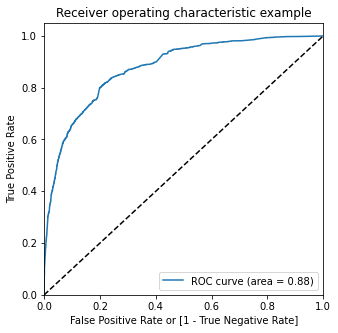

In [85]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Optimal Cut off Point

In [86]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.847685,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.205955,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.311087,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.957707,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.189862,9170,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.616290  0.972716  0.398179
0.2   0.2  0.723007  0.891691  0.619782
0.3   0.3  0.783898  0.842910  0.747786
0.4   0.4  0.794256  0.751964  0.820137
0.5   0.5  0.806654  0.673832  0.887933
0.6   0.6  0.802260  0.594047  0.929674
0.7   0.7  0.784212  0.509715  0.952188
0.8   0.8  0.755493  0.404713  0.970149
0.9   0.9  0.702919  0.232741  0.990640


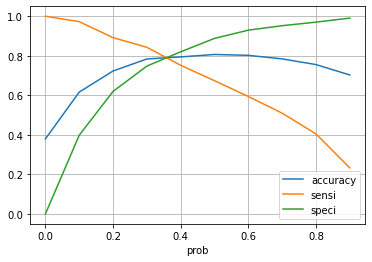

In [88]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

In [89]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.847685,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.205955,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.311087,1962,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.957707,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.189862,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [90]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.847685,7962,1,85
1,0,0.205955,5520,0,21
2,0,0.311087,1962,0,31
3,1,0.957707,1566,1,96
4,0,0.189862,9170,0,19


In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7959824231010671

In [92]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3102,  851],
       [ 449, 1970]], dtype=int64)

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(TP/float(TP+FN)) # Sensitivity
print(TN/float(TN+FP)) # Specificity
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.6738321620504341
0.8879332152795345
0.11206678472046547
0.7863000482392668
0.8164689462665736


this cutoff point is Ok

##### Prediction on Test Set

In [94]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,-0.058621,-0.108519,0.416452,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4050,-1.150166,-0.888077,-1.263530,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7201,-0.422469,0.420993,-0.143542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1196,0.305228,-0.110357,0.976446,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8219,1.396773,-0.433947,-0.283540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [95]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3504,-0.108519,0,0,1,0,0,0,0,0,0
4050,-0.888077,1,0,0,0,1,0,0,0,0
7201,0.420993,0,0,0,0,1,0,0,0,0
1196,-0.110357,0,0,1,0,0,0,0,0,0
8219,-0.433947,0,0,0,0,0,0,0,0,0


In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.323330
4050    0.958153
7201    0.677735
1196    0.322959
8219    0.166875
8747    0.071478
9048    0.592840
6524    0.086391
7693    0.446567
8187    0.958153
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.323330
4050,0.958153
7201,0.677735
1196,0.322959
8219,0.166875


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [100]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.323330
1,1,4050,0.958153
2,0,7201,0.677735
3,0,1196,0.322959
4,1,8219,0.166875


In [102]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.323330
1,1,4050,0.958153
2,0,7201,0.677735
3,0,1196,0.322959
4,1,8219,0.166875


In [103]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted
0,0,3504,0.323330,1
1,1,4050,0.958153,1
2,0,7201,0.677735,1
3,0,1196,0.322959,1
4,1,8219,0.166875,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.789088246063713

In [105]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1281,  408],
       [ 168,  874]], dtype=int64)

In [106]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

print(TP/float(TP+FN)) # Sensitivity
print(TN/float(TN+FP)) # Specificity
print(FP/float(TN+FP))
print(TP/float(TP+FP))
print(TN/float(TN+FN))

0.8387715930902111
0.7584369449378331
0.24156305506216696
0.6817472698907956
0.8840579710144928


# Final Inference

### Comparing Test & Train Data

Train Data:

Accuracy : 79.5 %
Sensitivity :67.3 %
Specificity:88.79 %

Test Data:

Accuracy : 78.9%
Sensitivity :83.8 %
Specificity:75.8 %

#### Assigning Lead Score to the Testing data

In [109]:
y_pred_final['Lead_Data'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted,Lead_Data
0,0,3504,0.323330,1,32
1,1,4050,0.958153,1,96
2,0,7201,0.677735,1,68
3,0,1196,0.322959,1,32
4,1,8219,0.166875,0,17


#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 75. They can be termed as 'Hot Leads'

In [110]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Data"]>=75]
hot_leads

,Converted,Prospect ID,Converted_prob,final_Predicted,Lead_Data
1,1,4050,0.958153,1,96
9,0,8187,0.958153,1,96
15,0,4726,0.808215,1,81
23,1,7005,0.990150,1,99
43,1,1991,0.808041,1,81
...,...,...,...,...,...
2721,1,4208,0.818013,1,82
2724,1,8348,0.883515,1,88
2725,1,4628,0.788307,1,79
2729,1,8043,0.800759,1,80


There are total of 551 hot leads that can be converted

In [111]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.594768
What is your current occupation_Working Professional    2.473036
Last Notable Activity_Unreachable                       2.140790
Last Activity_Had a Phone Conversation                  2.019818
Last Activity_SMS Sent                                  1.562937
Total Time Spent on Website                             0.922154
Last Activity_Email Opened                              0.569334
Last Notable Activity_Modified                         -0.623418
What is your current occupation_Not Provided           -1.106818
Last Activity_Email Bounced                            -1.171352
const                                                  -1.207775
dtype: float64

1. Leads coming from leads who are working professional are Good Leads
2. Leads coming from phone conversation are good leads
3. leads where emails have bounced should not be considered